In [1]:
#¡pip3 install follium

In [293]:
import pandas as pd
import numpy as np
from IPython.display import display
pd.options.display.max_columns = 50
import datetime
import seaborn as sns
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [294]:
poblacion="poblacion_provincias.xlsx"

In [295]:
poblacion=pd.read_excel(poblacion)

In [296]:
poblacion.head(18)

,FECHA,PROVINCIA,POBLACIÓN
0,2019,AVILA,157640
1,2019,BURGOS,356958
2,2019,LEON,460001
3,2019,PALENCIA,160980
4,2019,SALAMANCA,330119
5,2019,SEGOVIA,153129
6,2019,SORIA,88636
7,2019,VALLADOLID,5419546
8,2019,ZAMORA,172539


In [297]:
provincias_poblaciondf=list(set(poblacion['PROVINCIA']))
provincias_poblaciondf

['LEON',
 'PALENCIA',
 'ZAMORA',
 'BURGOS',
 'SEGOVIA',
 'SORIA',
 'VALLADOLID',
 'AVILA',
 'SALAMANCA']

In [298]:
ocupacion=pd.read_excel('ocupacion-de-camas-en-hospitales.xlsx')

In [299]:
ocupacion.shape

(5962, 11)

In [300]:
df=ocupacion.drop_duplicates()

In [301]:
df.shape

(5962, 11)

In [302]:
df.head()

,fecha,hospital,provincia,camas_iniciales_planta,camas_habilitadas_planta,camas_ocupadas_planta,camas_iniciales_uci,camas_habilitadas_uci,camas_ocupadas_uci,camas_ocupadas_covid_uci,codigo_ine
0,2021-05-20,Complejo Asistencial de Ávila,Ávila,422,359.0,278.0,14.0,18.0,11.0,7.0,5019
1,2021-05-19,Complejo Asistencial de Ávila,Ávila,422,360.0,270.0,14.0,18.0,11.0,7.0,5019
2,2021-05-18,Complejo Asistencial de Ávila,Ávila,422,359.0,256.0,14.0,18.0,14.0,8.0,5019
3,2021-05-17,Complejo Asistencial de Ávila,Ávila,422,357.0,248.0,14.0,18.0,13.0,8.0,5019
4,2021-05-16,Complejo Asistencial de Ávila,Ávila,422,358.0,229.0,14.0,18.0,11.0,8.0,5019


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962 entries, 0 to 5961
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   fecha                     5962 non-null   datetime64[ns]
 1   hospital                  5962 non-null   object        
 2   provincia                 5962 non-null   object        
 3   camas_iniciales_planta    5962 non-null   int64         
 4   camas_habilitadas_planta  5959 non-null   float64       
 5   camas_ocupadas_planta     5958 non-null   float64       
 6   camas_iniciales_uci       5532 non-null   float64       
 7   camas_habilitadas_uci     5959 non-null   float64       
 8   camas_ocupadas_uci        5959 non-null   float64       
 9   camas_ocupadas_covid_uci  3242 non-null   float64       
 10  codigo_ine                5962 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 558.9+ KB


### Fecha

In [304]:
df['AÑO'] =df['fecha'].dt.year 
df['MES'] =df['fecha'].dt.month
df['DIA_SEM'] =df['fecha'].dt.dayofweek
df.head()

,fecha,hospital,provincia,camas_iniciales_planta,camas_habilitadas_planta,camas_ocupadas_planta,camas_iniciales_uci,camas_habilitadas_uci,camas_ocupadas_uci,camas_ocupadas_covid_uci,codigo_ine,AÑO,MES,DIA_SEM
0,2021-05-20,Complejo Asistencial de Ávila,Ávila,422,359.0,278.0,14.0,18.0,11.0,7.0,5019,2021,5,3
1,2021-05-19,Complejo Asistencial de Ávila,Ávila,422,360.0,270.0,14.0,18.0,11.0,7.0,5019,2021,5,2
2,2021-05-18,Complejo Asistencial de Ávila,Ávila,422,359.0,256.0,14.0,18.0,14.0,8.0,5019,2021,5,1
3,2021-05-17,Complejo Asistencial de Ávila,Ávila,422,357.0,248.0,14.0,18.0,13.0,8.0,5019,2021,5,0
4,2021-05-16,Complejo Asistencial de Ávila,Ávila,422,358.0,229.0,14.0,18.0,11.0,8.0,5019,2021,5,6


In [305]:
df['L-D'] = df.DIA_SEM.replace({1: "LUNES", 2: "MARTES", 3:"MIERCOLES",
                                                4: "JUEVES",5:"VIERNES", 6:"SABADO",7:"DOMINGO"})

df.head()

,fecha,hospital,provincia,camas_iniciales_planta,camas_habilitadas_planta,camas_ocupadas_planta,camas_iniciales_uci,camas_habilitadas_uci,camas_ocupadas_uci,camas_ocupadas_covid_uci,codigo_ine,AÑO,MES,DIA_SEM,L-D
0,2021-05-20,Complejo Asistencial de Ávila,Ávila,422,359.0,278.0,14.0,18.0,11.0,7.0,5019,2021,5,3,MIERCOLES
1,2021-05-19,Complejo Asistencial de Ávila,Ávila,422,360.0,270.0,14.0,18.0,11.0,7.0,5019,2021,5,2,MARTES
2,2021-05-18,Complejo Asistencial de Ávila,Ávila,422,359.0,256.0,14.0,18.0,14.0,8.0,5019,2021,5,1,LUNES
3,2021-05-17,Complejo Asistencial de Ávila,Ávila,422,357.0,248.0,14.0,18.0,13.0,8.0,5019,2021,5,0,0
4,2021-05-16,Complejo Asistencial de Ávila,Ávila,422,358.0,229.0,14.0,18.0,11.0,8.0,5019,2021,5,6,SABADO


In [306]:
with pd.option_context('display.max_rows', 8):
    display(df.describe(include=[np.number]).T)

,count,mean,std,min,25%,50%,75%,max
camas_iniciales_planta,5962.0,394.352566,243.032131,0.0,119.0,372.0,573.00,850.0
camas_habilitadas_planta,5959.0,380.165296,234.691456,0.0,119.0,367.0,541.00,894.0
camas_ocupadas_planta,5958.0,256.552199,169.960267,0.0,79.0,237.0,376.75,776.0
camas_iniciales_uci,5532.0,18.909436,17.817683,0.0,0.0,14.0,33.00,60.0
...,...,...,...,...,...,...,...,...
codigo_ine,5962.0,31284.951359,16021.283738,5019.0,9059.0,37274.0,47186.00,49275.0
AÑO,5962.0,2020.352231,0.477705,2020.0,2020.0,2020.0,2021.00,2021.0
MES,5962.0,6.258806,3.349458,1.0,4.0,6.0,9.00,12.0
DIA_SEM,5962.0,2.942301,1.975617,0.0,1.0,3.0,5.00,6.0


In [307]:
with pd.option_context('display.max_rows', 5):
    display(df.describe(include=[np.number], 
                 percentiles=[.01, .05, .10, .25, .5, .75, .9, .95, .99]).T)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
camas_iniciales_planta,5962.0,394.352566,243.032131,0.0,0.0,48.0,94.0,119.0,372.0,573.0,752.0,842.0,850.0,850.0
camas_habilitadas_planta,5959.0,380.165296,234.691456,0.0,0.0,48.0,95.0,119.0,367.0,541.0,770.0,817.0,876.0,894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MES,5962.0,6.258806,3.349458,1.0,1.0,1.0,2.0,4.0,6.0,9.0,11.0,12.0,12.0,12.0
DIA_SEM,5962.0,2.942301,1.975617,0.0,0.0,0.0,0.0,1.0,3.0,5.0,6.0,6.0,6.0,6.0


In [308]:
df.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
hospital,5962,16,Complejo Asistencial de Segovia,402
provincia,5962,9,Valladolid,1540
L-D,5962,7,MIERCOLES,876


In [309]:
#let's check % of nulls

def null_cols(df):
    nulls = df.isna().sum()
    return nulls[nulls > 0] / len(df) * 100
null_cols(df)

camas_habilitadas_planta     0.050319
camas_ocupadas_planta        0.067092
camas_iniciales_uci          7.212345
camas_habilitadas_uci        0.050319
camas_ocupadas_uci           0.050319
camas_ocupadas_covid_uci    45.622274
dtype: float64

##  ‘all’ : If all values are NaN, drop that row or column.

In [310]:
df = df.dropna(how='all')
len(df)
#db = db.dropna() dropea todo si algún valor es NaN
#There is no null rows becacause the len remains the same.

5962

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962 entries, 0 to 5961
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   fecha                     5962 non-null   datetime64[ns]
 1   hospital                  5962 non-null   object        
 2   provincia                 5962 non-null   object        
 3   camas_iniciales_planta    5962 non-null   int64         
 4   camas_habilitadas_planta  5959 non-null   float64       
 5   camas_ocupadas_planta     5958 non-null   float64       
 6   camas_iniciales_uci       5532 non-null   float64       
 7   camas_habilitadas_uci     5959 non-null   float64       
 8   camas_ocupadas_uci        5959 non-null   float64       
 9   camas_ocupadas_covid_uci  3242 non-null   float64       
 10  codigo_ine                5962 non-null   int64         
 11  AÑO                       5962 non-null   int64         
 12  MES                 

### Hospital:

In [312]:
lista_hospitales=list(set(df['hospital']))
(lista_hospitales)

['Edificio Rondilla',
 'Complejo Asistencial de Segovia',
 'Complejo Asistencial Universitario de Palencia',
 'Hospital Santiago Apóstol',
 'Hospital Universitario Río Hortega',
 'Hospital de Medina del Campo',
 'Complejo Asistencial de Zamora',
 'Hospital Clínico Universitario de Valladolid',
 'Complejo Asistencial de Soria',
 'Complejo Asistencial Universitario de Salamanca',
 'Hospital habilitado Feria de Muestras Valladolid',
 'Complejo Asistencial Universitario de Burgos',
 'Hospital Santos Reyes',
 'Hospital El Bierzo',
 'Complejo Asistencial de Ávila',
 'Complejo Asistencial Universitario de León']

### Test and check the correct addresses and safe in an excel file.

In [313]:
#Importing the Nominatim geocoder class 
#from geopy.geocoders import Nominatim
 
#address we need to geocode
#loc = 'hospital rio carrion'

 
#making an instance of Nominatim class
#geolocator = Nominatim(user_agent="my_request")
 
#applying geocode method to get the location
#location = geolocator.geocode(loc)
 
#printing address and coordinates
#print(location.address)
#print((location.latitude, location.longitude))

In [314]:
hospitales_direcciones=pd.read_excel('hospitales_direcciones.xlsx')
hospitales_direcciones

,hospital,Dirección
0,Complejo Asistencial de Ávila,"Av. Juan Carlos I, s/n, 05071 Ávila"
1,Complejo Asistencial Universitario de León,"Calle del Hospital, León, Castilla y León, 240..."
2,Hospital de Medina del Campo,"Ctra. Peñaranda, 24, 47400 Medina del Campo, V..."
3,Hospital Universitario Río Hortega,"Calle Dulzaina, 2, 47012 Valladolid"
4,Hospital Santos Reyes,"Av. Ruperta Baraya, 6, 09400 Aranda de Duero, ..."
5,Complejo Asistencial Universitario de Burgos,"Av. Islas Baleares, 3, 09006 Burgos"
6,Hospital El Bierzo,"Calle Médicos Sin Fronteras, Fuentesnuevas, Po..."
7,Edificio Rondilla,Hospital Clínico Universitario de Valladolid
8,Hospital Santiago Apóstol,"Paseo Orón, 09200 Miranda de Ebro, Burgos"
9,Complejo Asistencial de Segovia,"Calle Erik Clavería “Neurólogo”, Segovia, Cast..."


In [315]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [316]:
#Importing the required modules
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [317]:
#Creating an instance of Nominatim Class
geolocator = Nominatim(user_agent="my_request")

#applying the rate limiter wrapper
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [318]:
from tqdm import tqdm
tqdm.pandas()
hospitales_direcciones['Hospital_coordenadas'] = hospitales_direcciones['Dirección'].progress_apply(geocode)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:15<00:00,  1.05it/s]


In [319]:
hospitales_direcciones.head()

,hospital,Dirección,Hospital_coordenadas
0,Complejo Asistencial de Ávila,"Av. Juan Carlos I, s/n, 05071 Ávila","(Avenida Juan Carlos I, Calle Rejero Lorenzo d..."
1,Complejo Asistencial Universitario de León,"Calle del Hospital, León, Castilla y León, 240...","(Calle del Hospital, León, Castilla y León, 24..."
2,Hospital de Medina del Campo,"Ctra. Peñaranda, 24, 47400 Medina del Campo, V...","(Hospital Comarcal, 24, Carretera de Peñaranda..."
3,Hospital Universitario Río Hortega,"Calle Dulzaina, 2, 47012 Valladolid","(Calle La Dulzaina, Alcazarén, Valladolid, Cas..."
4,Hospital Santos Reyes,"Av. Ruperta Baraya, 6, 09400 Aranda de Duero, ...","(Avenida Doña Ruperta Baraya, Aranda de Duero,..."


In [393]:
hospitales_direcciones['LAT'] =hospitales_direcciones['Hospital_coordenadas'].apply(lambda x: x.latitude if x else None)
hospitales_direcciones['LON']= hospitales_direcciones['Hospital_coordenadas'].apply(lambda x: x.longitude if x else None) 
hospitales_direcciones.head()

,hospital,Dirección,Hospital_coordenadas,LAT,LON
0,Complejo Asistencial de Ávila,"Av. Juan Carlos I, s/n, 05071 Ávila","(Avenida Juan Carlos I, Calle Rejero Lorenzo d...",40.661491,-4.674118
1,Complejo Asistencial Universitario de León,"Calle del Hospital, León, Castilla y León, 240...","(Calle del Hospital, León, Castilla y León, 24...",42.617711,-5.573044
2,Hospital de Medina del Campo,"Ctra. Peñaranda, 24, 47400 Medina del Campo, V...","(Hospital Comarcal, 24, Carretera de Peñaranda...",41.295322,-4.911602
3,Hospital Universitario Río Hortega,"Calle Dulzaina, 2, 47012 Valladolid","(Calle La Dulzaina, Alcazarén, Valladolid, Cas...",41.367899,-4.675541
4,Hospital Santos Reyes,"Av. Ruperta Baraya, 6, 09400 Aranda de Duero, ...","(Avenida Doña Ruperta Baraya, Aranda de Duero,...",41.668631,-3.695010


In [394]:
df['latitud']=df['hospital']
df['longitud']=df['hospital']

In [395]:
hospital_column_list = list(hospitales_direcciones['hospital'])
latitud_column_list = list(hospitales_direcciones['LAT'])
longitud_column_list = list(hospitales_direcciones['LON'])

In [446]:
conversion_dict_latitud= dict(zip(hospital_column_list,latitud_column_list))
conversion_dict_latitud

{'Complejo Asistencial de Ávila': 40.6614914,
 'Complejo Asistencial Universitario de León': 42.6177105,
 'Hospital de Medina del Campo': 41.295321799999996,
 'Hospital Universitario Río Hortega': 41.3678992,
 'Hospital Santos Reyes': 41.6686315,
 'Complejo Asistencial Universitario de Burgos': 42.3613402,
 'Hospital El Bierzo': 42.573132,
 'Edificio Rondilla': 41.656005750000006,
 'Hospital Santiago Apóstol': 42.6813532,
 'Complejo Asistencial de Segovia': 40.9432317,
 'Hospital Clínico Universitario de Valladolid': 41.6543123,
 'Complejo Asistencial Universitario de Palencia': 42.0017912,
 'Complejo Asistencial de Soria': 41.7721993,
 'Hospital habilitado Feria de Muestras Valladolid': 41.6561775,
 'Complejo Asistencial de Zamora': 41.5147826,
 'Complejo Asistencial Universitario de Salamanca': 40.964714900000004}

In [447]:
conversion_dict_longitud= dict(zip(hospital_column_list,longitud_column_list))
conversion_dict_longitud

{'Complejo Asistencial de Ávila': -4.6741179,
 'Complejo Asistencial Universitario de León': -5.5730436,
 'Hospital de Medina del Campo': -4.911602344013321,
 'Hospital Universitario Río Hortega': -4.6755411,
 'Hospital Santos Reyes': -3.6950096,
 'Complejo Asistencial Universitario de Burgos': -3.6855070886054726,
 'Hospital El Bierzo': -6.6424622,
 'Edificio Rondilla': -4.718737949587745,
 'Hospital Santiago Apóstol': -2.9628157,
 'Complejo Asistencial de Segovia': -4.12959,
 'Hospital Clínico Universitario de Valladolid': -4.7184499952485055,
 'Complejo Asistencial Universitario de Palencia': -4.5387063,
 'Complejo Asistencial de Soria': -2.4741287,
 'Hospital habilitado Feria de Muestras Valladolid': -4.7377357,
 'Complejo Asistencial de Zamora': -5.7298964,
 'Complejo Asistencial Universitario de Salamanca': -5.672835986605525}

In [448]:
df['latitud'] = df['latitud'].replace(conversion_dict_latitud)
df['longitud'] = df['longitud'].replace(conversion_dict_longitud)
df.head()

,fecha,hospital,provincia,camas_iniciales_planta,camas_habilitadas_planta,camas_ocupadas_planta,camas_iniciales_uci,camas_habilitadas_uci,camas_ocupadas_uci,camas_ocupadas_covid_uci,codigo_ine,AÑO,MES,DIA_SEM,L-D,latitud,longitud,POBLACION,camas_uci_ocupadas%,camas_uci_ocupadas_covid%,pobl_camas_habit,pobl_camas_habit_uci
0,2021-05-20,Complejo Asistencial de Ávila,Ávila,422,359.0,278.0,14.0,18.0,11.0,7.0,5019,2021,5,3,MIERCOLES,-4.674118,-4.674118,157640,0.611111,0.388889,0.002277,0.000114
1,2021-05-19,Complejo Asistencial de Ávila,Ávila,422,360.0,270.0,14.0,18.0,11.0,7.0,5019,2021,5,2,MARTES,-4.674118,-4.674118,157640,0.611111,0.388889,0.002284,0.000114
2,2021-05-18,Complejo Asistencial de Ávila,Ávila,422,359.0,256.0,14.0,18.0,14.0,8.0,5019,2021,5,1,LUNES,-4.674118,-4.674118,157640,0.777778,0.444444,0.002277,0.000114
3,2021-05-17,Complejo Asistencial de Ávila,Ávila,422,357.0,248.0,14.0,18.0,13.0,8.0,5019,2021,5,0,0,-4.674118,-4.674118,157640,0.722222,0.444444,0.002265,0.000114
4,2021-05-16,Complejo Asistencial de Ávila,Ávila,422,358.0,229.0,14.0,18.0,11.0,8.0,5019,2021,5,6,SABADO,-4.674118,-4.674118,157640,0.611111,0.444444,0.002271,0.000114


### Añadir poblacion

In [449]:
provincias_poblaciondf=sorted(list(set(poblacion['PROVINCIA'])))
provincias_poblaciondf

['Burgos',
 'León',
 'Palencia',
 'Salamanca',
 'Segovia',
 'Soria',
 'Valladolid',
 'Zamora',
 'Ávila']

In [450]:
provincias_df=list(set(df['provincia']))
provincias_df.sort(reverse=True)
provincias_df

['Ávila',
 'Zamora',
 'Valladolid',
 'Soria',
 'Segovia',
 'Salamanca',
 'Palencia',
 'León',
 'Burgos']

In [410]:
conversion_dict_provincias= dict(zip(provincias_poblaciondf,provincias_df))
conversion_dict_provincias

{'Burgos': 'Ávila',
 'León': 'Zamora',
 'Palencia': 'Valladolid',
 'Salamanca': 'Soria',
 'Segovia': 'Segovia',
 'Soria': 'Salamanca',
 'Valladolid': 'Palencia',
 'Zamora': 'León',
 'Ávila': 'Burgos'}

In [411]:
conversion_dict_provincias={'AVILA':"Ávila", 'BURGOS':"Burgos", 'LEON':"León",'PALENCIA':"Palencia",
                            'SALAMANCA':"Salamanca",'SEGOVIA':"Segovia",'SORIA':"Soria",
                            'VALLADOLID':"Valladolid",'ZAMORA':"Zamora"}


In [412]:
poblacion['PROVINCIA'] = poblacion['PROVINCIA'].replace(conversion_dict_provincias)
poblacion

,FECHA,PROVINCIA,POBLACIÓN
0,2019,Ávila,157640
1,2019,Burgos,356958
2,2019,León,460001
3,2019,Palencia,160980
4,2019,Salamanca,330119
5,2019,Segovia,153129
6,2019,Soria,88636
7,2019,Valladolid,5419546
8,2019,Zamora,172539


In [413]:
df_poblacion=poblacion.groupby('PROVINCIA').agg({'POBLACIÓN':'sum'})
df_poblacion.head(18)

,POBLACIÓN
PROVINCIA,
Burgos,356958
León,460001
Palencia,160980
Salamanca,330119
Segovia,153129
Soria,88636
Valladolid,5419546
Zamora,172539
Ávila,157640


In [414]:
df['POBLACION']=df['provincia']

In [415]:
poblacion_conv_dict={"Burgos":356958,"León":460001,"Palencia":160980,"Salamanca":330119,"Segovia":153129,"Soria":88636,
                     "Valladolid":519546,"Zamora":172539,"Ávila":157640}
df['POBLACION'] = df['POBLACION'].replace(poblacion_conv_dict)
df.head()

,fecha,hospital,provincia,camas_iniciales_planta,camas_habilitadas_planta,camas_ocupadas_planta,camas_iniciales_uci,camas_habilitadas_uci,camas_ocupadas_uci,camas_ocupadas_covid_uci,codigo_ine,AÑO,MES,DIA_SEM,L-D,latitud,longitud,POBLACION,camas_uci_ocupadas%,camas_uci_ocupadas_covid%,pobl_camas_habit,pobl_camas_habit_uci
0,2021-05-20,Complejo Asistencial de Ávila,Ávila,422,359.0,278.0,14.0,18.0,11.0,7.0,5019,2021,5,3,MIERCOLES,-4.674118,-4.674118,157640,0.611111,0.388889,0.002277,0.000114
1,2021-05-19,Complejo Asistencial de Ávila,Ávila,422,360.0,270.0,14.0,18.0,11.0,7.0,5019,2021,5,2,MARTES,-4.674118,-4.674118,157640,0.611111,0.388889,0.002284,0.000114
2,2021-05-18,Complejo Asistencial de Ávila,Ávila,422,359.0,256.0,14.0,18.0,14.0,8.0,5019,2021,5,1,LUNES,-4.674118,-4.674118,157640,0.777778,0.444444,0.002277,0.000114
3,2021-05-17,Complejo Asistencial de Ávila,Ávila,422,357.0,248.0,14.0,18.0,13.0,8.0,5019,2021,5,0,0,-4.674118,-4.674118,157640,0.722222,0.444444,0.002265,0.000114
4,2021-05-16,Complejo Asistencial de Ávila,Ávila,422,358.0,229.0,14.0,18.0,11.0,8.0,5019,2021,5,6,SABADO,-4.674118,-4.674118,157640,0.611111,0.444444,0.002271,0.000114


### Calculando el porcentaje camas ocupadas uci

In [416]:
df["camas_uci_ocupadas%"]=df["camas_ocupadas_uci"]/df["camas_habilitadas_uci"]

In [417]:
df["camas_uci_ocupadas_covid%"]=df["camas_ocupadas_covid_uci"]/df["camas_habilitadas_uci"]

In [418]:
df["pobl_camas_habit"]=df["camas_habilitadas_planta"]/df["POBLACION"]

In [419]:
df["pobl_camas_habit_uci"]=df["camas_habilitadas_uci"]/df["POBLACION"]

In [420]:
df.head()

,fecha,hospital,provincia,camas_iniciales_planta,camas_habilitadas_planta,camas_ocupadas_planta,camas_iniciales_uci,camas_habilitadas_uci,camas_ocupadas_uci,camas_ocupadas_covid_uci,codigo_ine,AÑO,MES,DIA_SEM,L-D,latitud,longitud,POBLACION,camas_uci_ocupadas%,camas_uci_ocupadas_covid%,pobl_camas_habit,pobl_camas_habit_uci
0,2021-05-20,Complejo Asistencial de Ávila,Ávila,422,359.0,278.0,14.0,18.0,11.0,7.0,5019,2021,5,3,MIERCOLES,-4.674118,-4.674118,157640,0.611111,0.388889,0.002277,0.000114
1,2021-05-19,Complejo Asistencial de Ávila,Ávila,422,360.0,270.0,14.0,18.0,11.0,7.0,5019,2021,5,2,MARTES,-4.674118,-4.674118,157640,0.611111,0.388889,0.002284,0.000114
2,2021-05-18,Complejo Asistencial de Ávila,Ávila,422,359.0,256.0,14.0,18.0,14.0,8.0,5019,2021,5,1,LUNES,-4.674118,-4.674118,157640,0.777778,0.444444,0.002277,0.000114
3,2021-05-17,Complejo Asistencial de Ávila,Ávila,422,357.0,248.0,14.0,18.0,13.0,8.0,5019,2021,5,0,0,-4.674118,-4.674118,157640,0.722222,0.444444,0.002265,0.000114
4,2021-05-16,Complejo Asistencial de Ávila,Ávila,422,358.0,229.0,14.0,18.0,11.0,8.0,5019,2021,5,6,SABADO,-4.674118,-4.674118,157640,0.611111,0.444444,0.002271,0.000114


In [421]:
saturacion_info = df.groupby(['provincia', 'AÑO'])\
                      .agg({'camas_uci_ocupadas%':['mean','max','min','median'], 
                                    'camas_uci_ocupadas_covid%':['mean',"max","min"]}).astype(float)
saturacion_info

camas_uci_ocupadas%                                \
                               mean       max       min    median   
provincia  AÑO                                                      
Burgos     2020            0.624567  0.972973  0.342857  0.621622   
           2021            0.534510  0.764045  0.382022  0.516854   
León       2020            0.468710  0.860465  0.000000  0.500000   
           2021            0.597120  1.000000  0.157895  0.578947   
Palencia   2020            0.685101  1.388889  0.375000  0.687500   
           2021            0.609559  0.812500  0.312500  0.625000   
Salamanca  2020            0.620836  0.879310  0.360000  0.620690   
           2021            0.657980  0.945946  0.459459  0.646905   
Segovia    2020            0.385046  0.793103  0.090909  0.363636   
           2021            0.548459  0.870968  0.354839  0.548387   
Soria      2020            0.457340  0.875000  0.062500  0.470588   
           2021            0.701005  1.000000  0.411765  0.720000   
Valladolid 2020            0.663942  1.000000  0.000000  0.701190   
           2021            0.783623  1.000000  0.558140  0.780625   
Zamora     2020            0.368121  0.789474  0.058824  0.366667   
           2021            0.464229  0.947368  0.210526  0.421053   
Ávila      2020            0.471666  1.000000  0.052632  0.454545   
           2021            0.529762  0.777778  0.166667  0.555556   

                camas_uci_ocupadas_covid%                      
                                     mean       max       min  
provincia  AÑO                                                 
Burgos     2020                  0.417800  0.606061  0.245283  
           2021                  0.280899  0.460674  0.179775  
León       2020                  0.358473  0.565217  0.151515  
           2021                  0.371424  0.826087  0.131579  
Palencia   2020                  0.475234  0.625000  0.275000  
           2021                  0.434276  0.675000  0.250000  
Salamanca  2020                  0.292170  0.432432  0.094595  
           2021                  0.238104  0.594595  0.048387  
Segovia    2020                  0.221269  0.392857  0.105263  
           2021                  0.407685  0.580645  0.225806  
Soria      2020                  0.290024  0.428571  0.117647  
           2021                  0.533089  0.880000  0.280000  
Valladolid 2020                  0.492447  0.814815  0.247059  
           2021                  0.427905  0.875000  0.164384  
Zamora     2020                  0.449903  0.736842  0.176471  
           2021                  0.350883  0.789474  0.105263  
Ávila      2020                  0.433658  0.666667  0.166667  
           2021                  0.300000  0.555556  0.111111

In [422]:
saturacion_info_mean = df.groupby(['provincia', 'AÑO'])\
                      .agg({'camas_uci_ocupadas%':['mean'], 
                                    'camas_uci_ocupadas_covid%':['mean']}).astype(float)
saturacion_info_mean

camas_uci_ocupadas% camas_uci_ocupadas_covid%
                               mean                      mean
provincia  AÑO                                               
Burgos     2020            0.624567                  0.417800
           2021            0.534510                  0.280899
León       2020            0.468710                  0.358473
           2021            0.597120                  0.371424
Palencia   2020            0.685101                  0.475234
           2021            0.609559                  0.434276
Salamanca  2020            0.620836                  0.292170
           2021            0.657980                  0.238104
Segovia    2020            0.385046                  0.221269
           2021            0.548459                  0.407685
Soria      2020            0.457340                  0.290024
           2021            0.701005                  0.533089
Valladolid 2020            0.663942                  0.492447
           2021            0.783623                  0.427905
Zamora     2020            0.368121                  0.449903
           2021            0.464229                  0.350883
Ávila      2020            0.471666                  0.433658
           2021            0.529762                  0.300000

In [423]:
saturacion_info = df.groupby(['provincia', 'AÑO',"MES"])\
                      .agg({'camas_uci_ocupadas%':['mean','max','min','median'], 
                                    'camas_uci_ocupadas_covid%':['mean',"max","min"]}).astype(float)
saturacion_info.head(3)

camas_uci_ocupadas%                                \
                                  mean       max       min    median   
provincia AÑO  MES                                                     
Burgos    2020 4              0.633224  0.815789  0.407895  0.644737   
               5              0.594360  0.837838  0.397436  0.540541   
               6              0.560638  0.648649  0.459459  0.548048   

                   camas_uci_ocupadas_covid%          
                                        mean max min  
provincia AÑO  MES                                    
Burgos    2020 4                         NaN NaN NaN  
               5                         NaN NaN NaN  
               6                         NaN NaN NaN

In [424]:
saturacion_info = df.groupby(['AÑO','provincia'])\
                      .agg({'camas_uci_ocupadas%':['mean','max','min','median'], 
                                    'camas_uci_ocupadas_covid%':['mean',"max","min"]}).astype(float)
saturacion_info.head(100)

camas_uci_ocupadas%                                \
                               mean       max       min    median   
AÑO  provincia                                                      
2020 Burgos                0.624567  0.972973  0.342857  0.621622   
     León                  0.468710  0.860465  0.000000  0.500000   
     Palencia              0.685101  1.388889  0.375000  0.687500   
     Salamanca             0.620836  0.879310  0.360000  0.620690   
     Segovia               0.385046  0.793103  0.090909  0.363636   
     Soria                 0.457340  0.875000  0.062500  0.470588   
     Valladolid            0.663942  1.000000  0.000000  0.701190   
     Zamora                0.368121  0.789474  0.058824  0.366667   
     Ávila                 0.471666  1.000000  0.052632  0.454545   
2021 Burgos                0.534510  0.764045  0.382022  0.516854   
     León                  0.597120  1.000000  0.157895  0.578947   
     Palencia              0.609559  0.812500  0.312500  0.625000   
     Salamanca             0.657980  0.945946  0.459459  0.646905   
     Segovia               0.548459  0.870968  0.354839  0.548387   
     Soria                 0.701005  1.000000  0.411765  0.720000   
     Valladolid            0.783623  1.000000  0.558140  0.780625   
     Zamora                0.464229  0.947368  0.210526  0.421053   
     Ávila                 0.529762  0.777778  0.166667  0.555556   

                camas_uci_ocupadas_covid%                      
                                     mean       max       min  
AÑO  provincia                                                 
2020 Burgos                      0.417800  0.606061  0.245283  
     León                        0.358473  0.565217  0.151515  
     Palencia                    0.475234  0.625000  0.275000  
     Salamanca                   0.292170  0.432432  0.094595  
     Segovia                     0.221269  0.392857  0.105263  
     Soria                       0.290024  0.428571  0.117647  
     Valladolid                  0.492447  0.814815  0.247059  
     Zamora                      0.449903  0.736842  0.176471  
     Ávila                       0.433658  0.666667  0.166667  
2021 Burgos                      0.280899  0.460674  0.179775  
     León                        0.371424  0.826087  0.131579  
     Palencia                    0.434276  0.675000  0.250000  
     Salamanca                   0.238104  0.594595  0.048387  
     Segovia                     0.407685  0.580645  0.225806  
     Soria                       0.533089  0.880000  0.280000  
     Valladolid                  0.427905  0.875000  0.164384  
     Zamora                      0.350883  0.789474  0.105263  
     Ávila                       0.300000  0.555556  0.111111

In [425]:
saturacion_info = df.groupby(['provincia','AÑO'])\
                      .agg({'camas_uci_ocupadas%':['mean','max','min','median'], 
                                    'camas_uci_ocupadas_covid%':['mean',"max","min"]}).astype(float)
saturacion_info.head(100)

camas_uci_ocupadas%                                \
                               mean       max       min    median   
provincia  AÑO                                                      
Burgos     2020            0.624567  0.972973  0.342857  0.621622   
           2021            0.534510  0.764045  0.382022  0.516854   
León       2020            0.468710  0.860465  0.000000  0.500000   
           2021            0.597120  1.000000  0.157895  0.578947   
Palencia   2020            0.685101  1.388889  0.375000  0.687500   
           2021            0.609559  0.812500  0.312500  0.625000   
Salamanca  2020            0.620836  0.879310  0.360000  0.620690   
           2021            0.657980  0.945946  0.459459  0.646905   
Segovia    2020            0.385046  0.793103  0.090909  0.363636   
           2021            0.548459  0.870968  0.354839  0.548387   
Soria      2020            0.457340  0.875000  0.062500  0.470588   
           2021            0.701005  1.000000  0.411765  0.720000   
Valladolid 2020            0.663942  1.000000  0.000000  0.701190   
           2021            0.783623  1.000000  0.558140  0.780625   
Zamora     2020            0.368121  0.789474  0.058824  0.366667   
           2021            0.464229  0.947368  0.210526  0.421053   
Ávila      2020            0.471666  1.000000  0.052632  0.454545   
           2021            0.529762  0.777778  0.166667  0.555556   

                camas_uci_ocupadas_covid%                      
                                     mean       max       min  
provincia  AÑO                                                 
Burgos     2020                  0.417800  0.606061  0.245283  
           2021                  0.280899  0.460674  0.179775  
León       2020                  0.358473  0.565217  0.151515  
           2021                  0.371424  0.826087  0.131579  
Palencia   2020                  0.475234  0.625000  0.275000  
           2021                  0.434276  0.675000  0.250000  
Salamanca  2020                  0.292170  0.432432  0.094595  
           2021                  0.238104  0.594595  0.048387  
Segovia    2020                  0.221269  0.392857  0.105263  
           2021                  0.407685  0.580645  0.225806  
Soria      2020                  0.290024  0.428571  0.117647  
           2021                  0.533089  0.880000  0.280000  
Valladolid 2020                  0.492447  0.814815  0.247059  
           2021                  0.427905  0.875000  0.164384  
Zamora     2020                  0.449903  0.736842  0.176471  
           2021                  0.350883  0.789474  0.105263  
Ávila      2020                  0.433658  0.666667  0.166667  
           2021                  0.300000  0.555556  0.111111

In [426]:
df.columns

Index(['fecha', 'hospital', 'provincia', 'camas_iniciales_planta',
       'camas_habilitadas_planta', 'camas_ocupadas_planta',
       'camas_iniciales_uci', 'camas_habilitadas_uci', 'camas_ocupadas_uci',
       'camas_ocupadas_covid_uci', 'codigo_ine', 'AÑO', 'MES', 'DIA_SEM',
       'L-D', 'latitud', 'longitud', 'POBLACION', 'camas_uci_ocupadas%',
       'camas_uci_ocupadas_covid%', 'pobl_camas_habit',
       'pobl_camas_habit_uci'],
      dtype='object')

In [427]:
poblacion_camas = df.groupby(['provincia'])\
                      .agg({'pobl_camas_habit':['mean','max','min','median'], 
                                    'pobl_camas_habit_uci':['mean',"max","min"]}).astype(float)
poblacion_camas.head(10)

pobl_camas_habit                                \
                       mean       max       min    median   
provincia                                                   
Burgos             0.000866  0.002356  0.000174  0.000319   
León               0.001289  0.001943  0.000465  0.001257   
Palencia           0.002461  0.003261  0.001460  0.002479   
Salamanca          0.001880  0.002351  0.001502  0.001917   
Segovia            0.002052  0.002749  0.001815  0.002122   
Soria              0.002948  0.003588  0.002031  0.003057   
Valladolid         0.000592  0.001295  0.000000  0.000751   
Zamora             0.002224  0.003211  0.001936  0.002133   
Ávila              0.002345  0.002848  0.001472  0.002372   

           pobl_camas_habit_uci                      
                           mean       max       min  
provincia                                            
Burgos                 0.000062  0.000249  0.000000  
León                   0.000086  0.000174  0.000020  
Palencia               0.000183  0.000255  0.000087  
Salamanca              0.000194  0.000248  0.000151  
Segovia                0.000169  0.000202  0.000111  
Soria                  0.000207  0.000305  0.000147  
Valladolid             0.000056  0.000192  0.000000  
Zamora                 0.000116  0.000174  0.000099  
Ávila                  0.000101  0.000140  0.000051

In [428]:
poblacion_camas = df.groupby(['provincia'])\
                      .agg({'pobl_camas_habit':['median'], 
                                    'pobl_camas_habit_uci':['median']}).astype(float)
poblacion_camas.head()

,pobl_camas_habit,pobl_camas_habit_uci
,median,median
provincia,,
Burgos,0.000319,0.000000
León,0.001257,0.000077
Palencia,0.002479,0.000199
Salamanca,0.001917,0.000188
Segovia,0.002122,0.000183


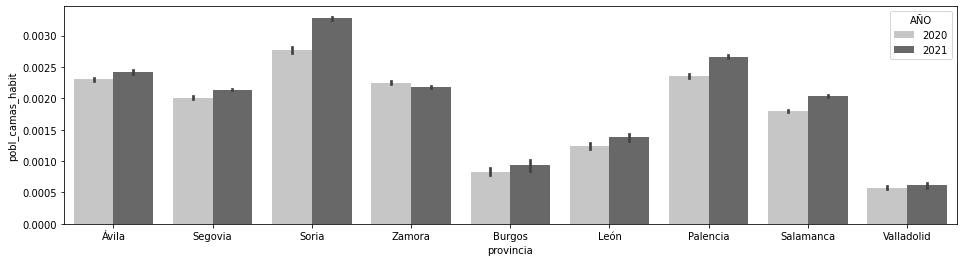

In [429]:
ax = sns.barplot(x='provincia', y='pobl_camas_habit', hue='AÑO', 
                 data=df, palette='Greys')
ax.figure.set_size_inches(16,4)

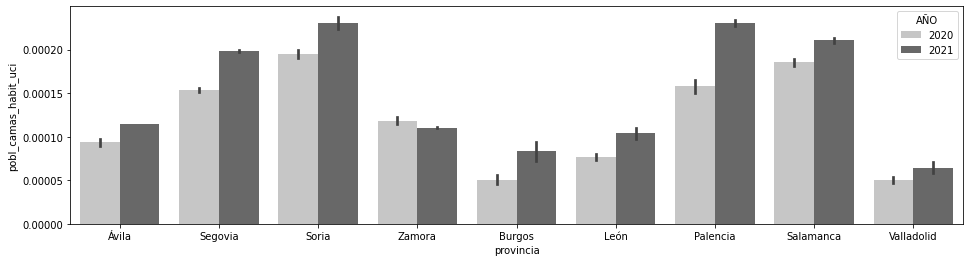

In [430]:
ax = sns.barplot(x='provincia', y='pobl_camas_habit_uci', hue='AÑO', 
                 data=df, palette='Greys')
ax.figure.set_size_inches(16,4)

Text(0.5, 0, '% Camas UCI ocupadas')

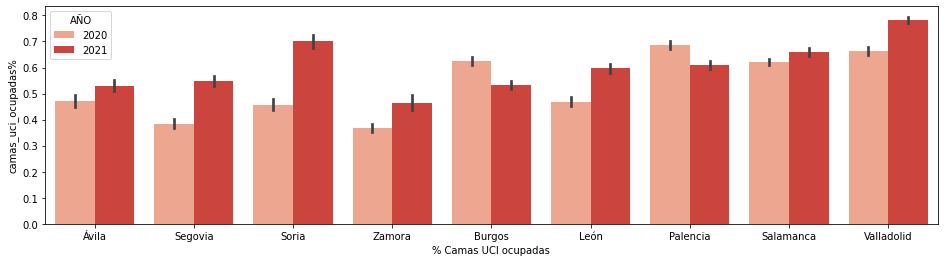

In [431]:
ax = sns.barplot(x='provincia', y='camas_uci_ocupadas%', hue='AÑO', 
                 data=df, palette='Reds')
ax.figure.set_size_inches(16,4)
ax.set_xlabel('% Camas UCI ocupadas')

Text(0.5, 0, '% Camas UCI ocupadas pacientes COVID')

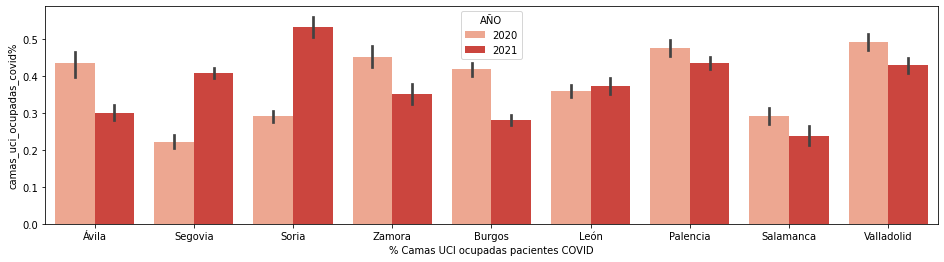

In [432]:
ax = sns.barplot(x='provincia', y='camas_uci_ocupadas_covid%', hue='AÑO', 
                 data=df, palette='Reds')
ax.figure.set_size_inches(16,4)
ax.set_xlabel('% Camas UCI ocupadas pacientes COVID')

Text(0, 0.5, '% Camas UCI ocupadas covid')

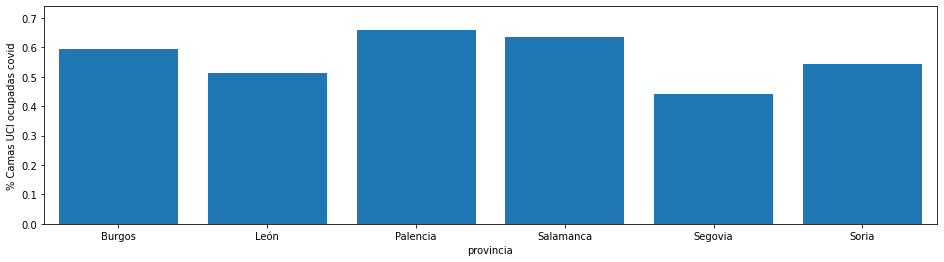

In [433]:
avg_sal = df.groupby('provincia', sort=True)['camas_uci_ocupadas%'].mean()
ax = avg_sal.plot(kind='bar', rot=0, figsize=(16,4), width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel('% Camas UCI ocupadas covid')

Text(0, 0.5, '% Camas UCI ocupadas covid')

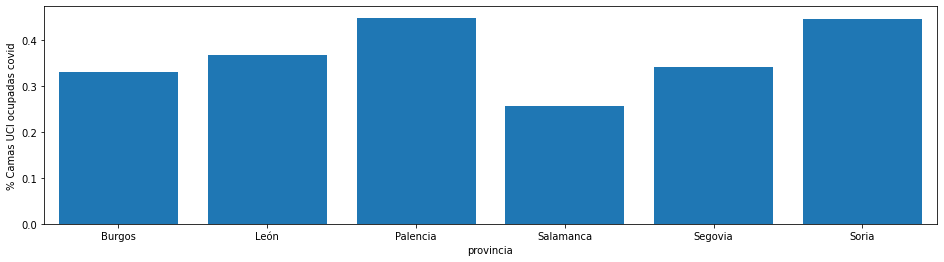

In [434]:
avg_sal = df.groupby('provincia', sort=True)['camas_uci_ocupadas_covid%'].mean()
ax = avg_sal.plot(kind='bar', rot=0, figsize=(16,4), width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel('% Camas UCI ocupadas covid')

<AxesSubplot:title={'center':'% Medio camas uci ocupadas'}, xlabel='AÑO'>

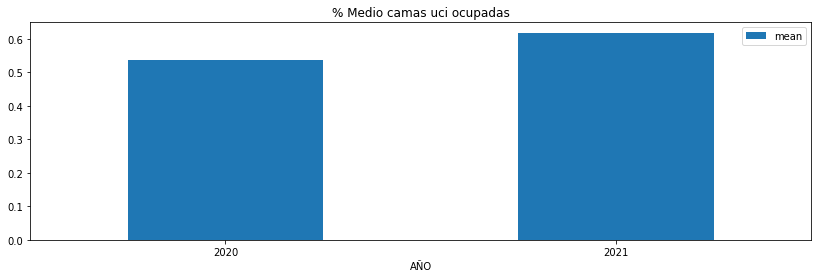

In [435]:
df.groupby('AÑO')['camas_uci_ocupadas%'] \
       .agg(['mean', 'count']) \
       .query('count > 100') \
       .sort_values('mean') \
       .tail(10) \
       .plot(kind='bar', y='mean', legend=True, 
             rot=0, figsize=(14,4),
             title='% Medio camas uci ocupadas')

<AxesSubplot:title={'center':'% Medio camas uci ocupadas'}, xlabel='AÑO'>

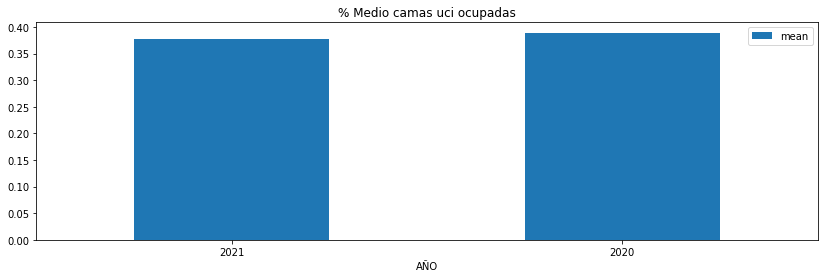

In [436]:
df.groupby('AÑO')['camas_uci_ocupadas_covid%'] \
       .agg(['mean', 'count']) \
       .query('count > 100') \
       .sort_values('mean') \
       .tail(10) \
       .plot(kind='bar', y='mean', legend=True, 
             rot=0, figsize=(14,4),
             title='% Medio camas uci ocupadas')

<AxesSubplot:title={'center':'% Medio camas uci ocupadas'}, xlabel='provincia'>

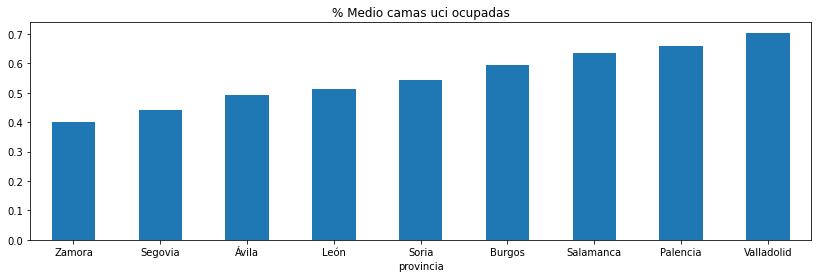

In [437]:
df.groupby('provincia')['camas_uci_ocupadas%'] \
       .agg(['mean', 'count']) \
       .query('count > 100') \
       .sort_values('mean') \
       .tail(10) \
       .plot(kind='bar', y='mean', legend=False, 
             rot=0, figsize=(14,4),
             title='% Medio camas uci ocupadas')

<AxesSubplot:title={'center':'% Medio camas uci ocupadas covid'}, xlabel='provincia'>

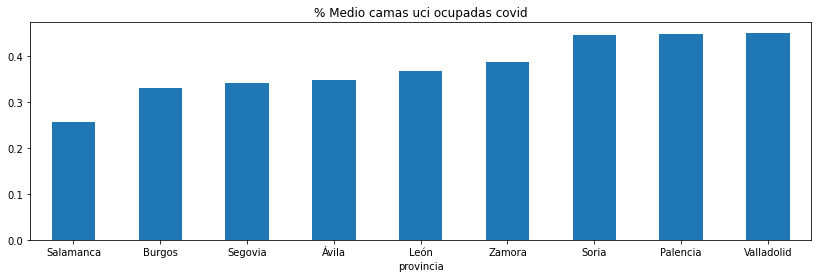

In [438]:
df.groupby('provincia')['camas_uci_ocupadas_covid%'] \
       .agg(['mean', 'count']) \
       .query('count > 100') \
       .sort_values('mean') \
       .tail(10) \
       .plot(kind='bar', y='mean', legend=False, 
             rot=0, figsize=(14,4),
             title='% Medio camas uci ocupadas covid')

In [439]:
df.columns

Index(['fecha', 'hospital', 'provincia', 'camas_iniciales_planta',
       'camas_habilitadas_planta', 'camas_ocupadas_planta',
       'camas_iniciales_uci', 'camas_habilitadas_uci', 'camas_ocupadas_uci',
       'camas_ocupadas_covid_uci', 'codigo_ine', 'AÑO', 'MES', 'DIA_SEM',
       'L-D', 'latitud', 'longitud', 'POBLACION', 'camas_uci_ocupadas%',
       'camas_uci_ocupadas_covid%', 'pobl_camas_habit',
       'pobl_camas_habit_uci'],
      dtype='object')

In [440]:
import plotly.express as px
fig=px.line(df, x="provincia",y='camas_uci_ocupadas_covid%')
fig.show()

In [441]:
fig=px.line(df, x="provincia",y='camas_uci_ocupadas%')
fig.show()

In [442]:
df_mapa=pd.DataFrame()
df_mapa['provincia']=df['provincia']
df_mapa['latitud']=df['latitud']
df_mapa['longitud']=df['longitud']
df_mapa['POBLACION']=df['POBLACION']

In [443]:
df_mapa2=df_mapa.groupby('provincia')['POBLACION','latitud','longitud'].max()
print(df_mapa2)

            POBLACION   latitud  longitud
provincia                                
Burgos         356958 -2.962816 -2.962816
León           460001 -5.573044 -5.573044
Palencia       160980 -4.538706 -4.538706
Salamanca      330119 -5.672836 -5.672836
Segovia        153129 -4.129590 -4.129590
Soria           88636 -2.474129 -2.474129
Valladolid     519546 -4.675541 -4.675541
Zamora         172539 -5.729896 -5.729896
Ávila          157640 -4.674118 -4.674118


<ipython-input-443-b21b063bd6de>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [444]:
import plotly.express as px
fig = px.density_mapbox(df_mapa2, lat='latitud', lon='longitud', z='POBLACION', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [288]:
df

,Date,Latitude,Longitude,Magnitude
0,01/02/1965,19.2460,145.6160,6.0
1,01/04/1965,1.8630,127.3520,5.8
2,01/05/1965,-20.5790,-173.9720,6.2
3,01/08/1965,-59.0760,-23.5570,5.8
4,01/09/1965,11.9380,126.4270,5.8
...,...,...,...,...
23407,12/28/2016,38.3917,-118.8941,5.6
23408,12/28/2016,38.3777,-118.8957,5.5
23409,12/28/2016,36.9179,140.4262,5.9
23410,12/29/2016,-9.0283,118.6639,6.3


In [ ]:
map = Map(location=[41.6529, -4.72839],zoom_start=1)

In [ ]:
map

In [ ]:
df_2020 = df[df.AÑO == 2020]
df_2021 = df[df.AÑO == 2021]

In [ ]:
agrupar_2020 = folium.FeatureGroup(name = "2020")
HeatMap(data = df_2020[["latitud","longitud"]], radius=15).add_to(agrupar_2020)
agrupar_2020.add_to(map)

In [ ]:
agrupar_2021 = folium.FeatureGroup(name = "2021")
HeatMap(data = df_2021[["latitud","longitud"]], radius=15).add_to(agrupar_2021)
agrupar_2021.add_to(map)

In [ ]:
folium.LayerControl(collapsed=True).add_to(map)

In [ ]:
map

In [ ]:
df.to_excel("tabla_con_coordenadas.xlsx")

In [ ]:
pip install pandas-profiling  

In [ ]:
from pandas_profiling.utils.cache import cache_file

In [ ]:
report = df.profile_report(sort='None', html={'style':{'full_width':True}})

In [ ]:
report